# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [6]:
data_2019.shape

(812153, 10)

In [7]:
data_2018.shape

(1375908, 10)

In [8]:
data_2017.shape

(1372645, 10)

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [9]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [10]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [11]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [12]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [13]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [14]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [15]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [16]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


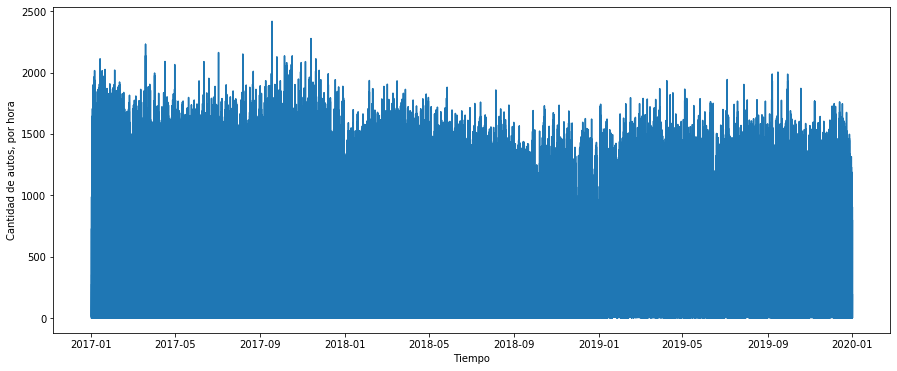

In [17]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [18]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización más amigale
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


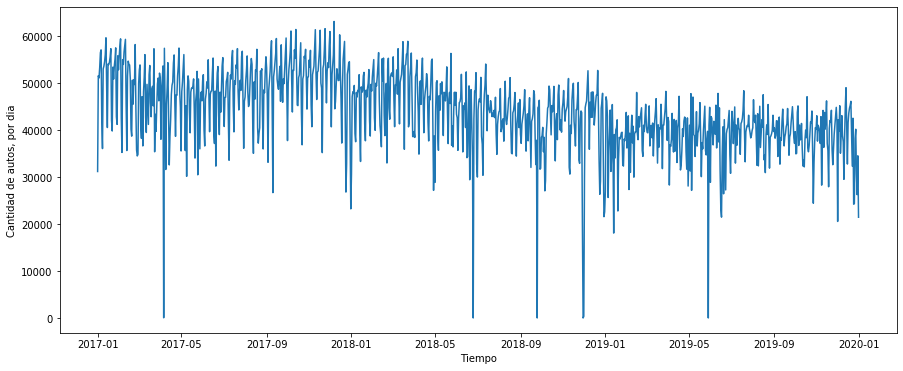

In [19]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.


En primera instancia, se analizará del dataset cuáles son los valores outliers, si existieron valores faltantes/nulos o no

In [20]:
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


1 - Análisis de outliers:

En el gráfico previo se evidencian valores que claramente se identifican como valores atípicos. Es por ello que se definirá un umbral de valores mínimos de 10.000 pasadas por día.


In [21]:
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01


In [22]:
outliers = diario[diario.cantidad_pasos < 10000 ]
print(outliers)

            cantidad_pasos
fecha                     
2017-04-06              40
2018-06-25               0
2018-09-25               0
2018-11-30               0
2018-12-01             350
2019-05-29               0


#Se destacan seis fechas del período analizado con valores casi nulos, impactadas por los siguientes eventos:

2017-04-06: Paro general https://www.lanacion.com.ar/politica/paro-del-6-de-abril-general-cgt-servicios-nid2005425/
2018-06-25: Paro General https://ctanacional.org/dev/tag/paro-nacional-25-junio-2018/
2018-09-25: Paro General https://www.clarin.com/viajes/paro-general-25-septiembre-operan-aeropuertos_0_0KqpCPX5B.html
2018-11-30: G20 https://www.infobae.com/politica/2018/10/30/el-gobierno-decreto-feriado-el-30-de-noviembre-en-la-ciudad-de-buenos-aires-por-la-cumbre-del-g20/
2018-12-01: G20
2019-05-29: Paro general https://elpais.com/internacional/2019/05/29/argentina/1559153842_024679.html


Como son eventos puntuales con razones justificadas, se evidencia que no se tratan de errores de medición por lo que se dejarán incluidos en el dataset.


2- Analisis de valores faltantes/nulos

In [23]:
pd.isna(dataset).sum()

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

Sin valores nulos. Viendo que la base se encuentra con outliers definidos y de proporción insignificante dentro del total de los datos y que no hay valores nulos, se trabajará en resamplear los datos a una visión semanal y mensual para analizar el comportamiento.

In [24]:
dataset_semanal = dataset.resample('W', on = 'fecha').sum()
semanal_promedio = dataset_semanal.cantidad_pasos.rolling(window = 4, center = True).mean()
semanal_promedio.head

<bound method NDFrame.head of fecha
2017-01-01          NaN
2017-01-08          NaN
2017-01-15    275505.75
2017-01-22    356355.25
2017-01-29    359402.50
                ...    
2019-12-08    271726.50
2019-12-15    278821.75
2019-12-22    268780.50
2019-12-29    212050.25
2020-01-05          NaN
Freq: W-SUN, Name: cantidad_pasos, Length: 158, dtype: float64>

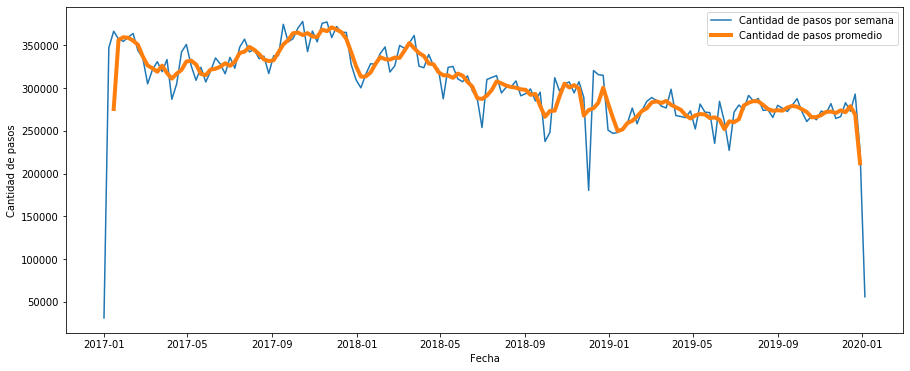

In [25]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset_semanal.cantidad_pasos, label = 'Cantidad de pasos por semana')
plt.plot(semanal_promedio, lw = 4 , label = 'Cantidad de pasos promedio')
plt.ylabel('Cantidad de pasos')
plt.xlabel('Fecha')
plt.legend()
plt.show()

El gráfico representac como con el correr del tiempo disminuye la cantidad de pasos abonados en efectivo en Av Illia, impactados posiblemente por la migración al canal de pago digital. 

En las próximas líneas se revisará el comportamiento de los siguientes eventos:
- Flujo mensual
- Flujo horario
- Flujo semanal
- Flujo por sentido de circulación
- Flujo por día de semana


Yendo a una visión mensual (para ver si se detectan mayores comportamientos) vemos que:

In [26]:
dataset.head

<bound method NDFrame.head of             dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]>

In [27]:
dataset["fecha"]=pd.to_datetime(dataset.fecha)
dataset["año"]= dataset["fecha"].dt.year
dataset["trimestre"]= dataset["fecha"].dt.quarter
dataset["mes"]= dataset["fecha"].dt.month
dataset["dia"]= dataset["fecha"].dt.day
dataset["hora"]= dataset["fecha"].dt.hour

In [28]:
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha,año,trimestre,mes,hora
0,1,Provincia,Pesado,1,2017-01-01 00:00:00,2017,1,1,0
1,1,Provincia,Liviano,9,2017-01-01 00:00:00,2017,1,1,0
2,1,Provincia,Liviano,644,2017-01-01 00:00:00,2017,1,1,0
3,1,Provincia,Pesado,6,2017-01-01 00:00:00,2017,1,1,0
4,1,Provincia,Pesado,1,2017-01-01 00:00:00,2017,1,1,0
...,...,...,...,...,...,...,...,...,...
238864,31,Provincia,Liviano,556,2019-12-31 22:00:00,2019,4,12,22
238865,31,Provincia,Pesado,1,2019-12-31 22:00:00,2019,4,12,22
238866,31,Centro,Liviano,580,2019-12-31 22:00:00,2019,4,12,22
238867,31,Centro,Liviano,214,2019-12-31 23:00:00,2019,4,12,23


In [29]:
dataset_mensual = dataset.groupby(["año", "mes"])[("cantidad_pasos")].sum().reset_index(name="cantidad_pasos")

Text(0.5, 1.0, 'Cantidad de pasos por mes y año')

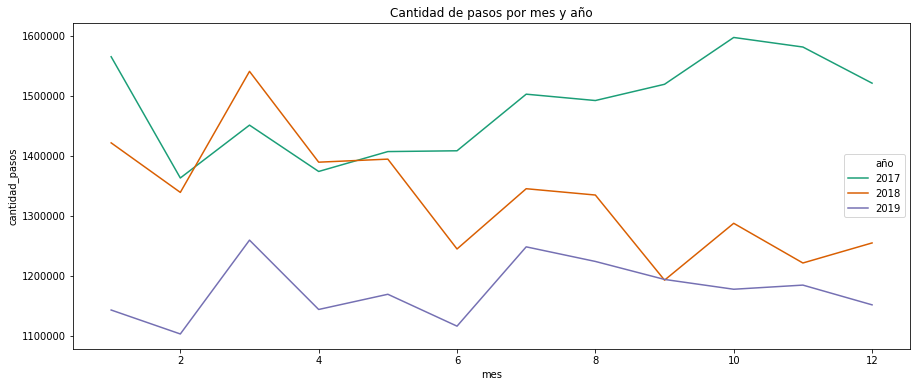

In [33]:
#Graficamos nuestros datos, tal como están

import seaborn as sns

plt.figure(figsize = (15,6))
sns.lineplot(data= dataset_mensual, x="mes", y= "cantidad_pasos", hue = "año", palette = "Dark2" )
plt.title("Cantidad de pasos por mes y año")

Además de notarse el impacto de la supuesta migración al canal digital, se pueden observar determinados meses donde el consumo de peaje cae, por ejemplo Febrero y Junio.

Estos meses posiblemente estén impactados por la disminución de la actividad por receso escolar y vacaciones, reduciendo el uso de automóvil (y consecuentemente peajes) en la ciudad.

Recopilando, se analizó cómo es la tendencia gral del uso de efectivo en Illia y cuál es la frecuencia mensual o meses con mayor/menor demanda.
Veamos qué pasa si analizamos el uso del peaje por horas.

Hipótesis: Las horas pico (8 AM y 6PM) debieran registrar un mayor uso de peaje por inicio y cierre de jornada escolar/laboral

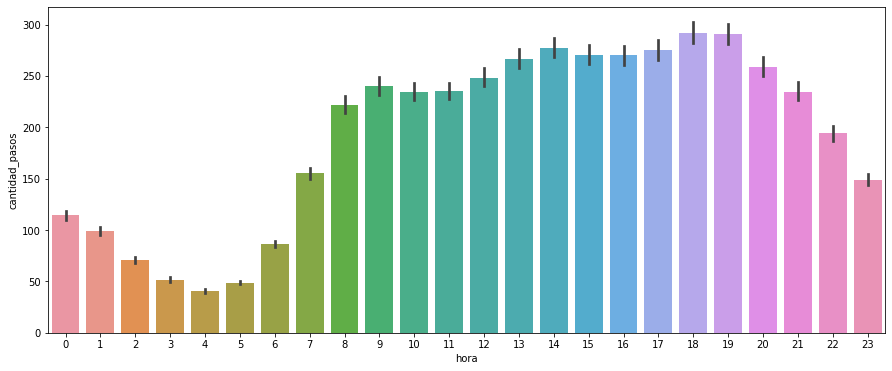

In [34]:
plt.figure(figsize =(15,6)) 
sns.barplot(data = dataset, x= "hora", y="cantidad_pasos")

Efectivamente se evidencia un mayor uso del peaje durante la jornada laboral/escolar, con picos en las horas 18 y 19 (regreso). Esto resulta razonable en los vehículos particulares (liviano). Veamos qué pasa cuando se apertura el análisis por tipo de vehículo: liviano y pesado.

Text(0.5, 1.0, 'Cantidad de pasos por hora y tipo de vehículo')

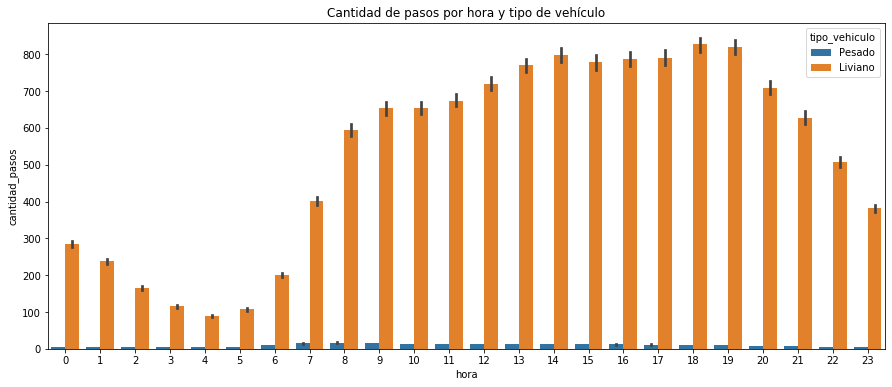

In [35]:
plt.figure(figsize =(15,6)) 
sns.barplot(data = dataset, x= "hora", y="cantidad_pasos", hue= "tipo_vehiculo")
plt.title("Cantidad de pasos por hora y tipo de vehículo")

- Analisis por sentido de circulación

Se propone analizar no solamente los horarios de circulación sino también verificar si se tratan de ingresos a la provincia o centro.

Text(0.5, 1.0, 'Cantidad de pasos por hora y sentido de circulación')

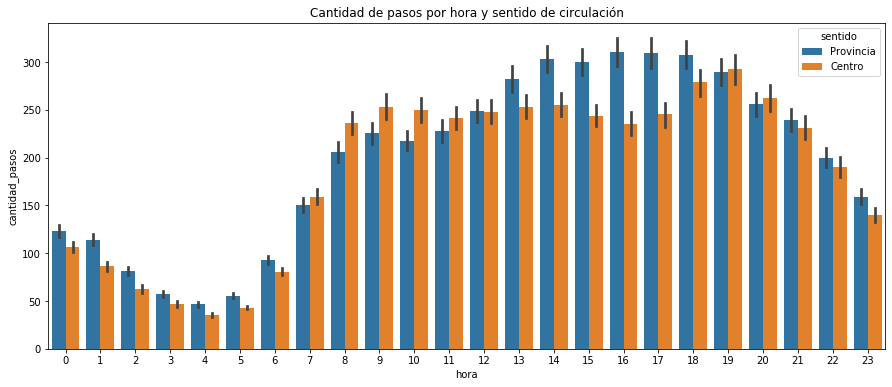

In [36]:
 plt.figure(figsize =(15,6)) 
sns.barplot(data = dataset, x= "hora", y="cantidad_pasos", hue= "sentido")
plt.title("Cantidad de pasos por hora y sentido de circulación")

Se evidencia que:

    - Durante las 13 a 17 horas hay mayores ingresos a provincia, suponiendo fin de determinadas jornadas laborales/escolares
    
    - Durante la mañana los ingresos a centro son mayores que a la provincia, indicando el comienzo de las jornadas
    
    - Nuevamente a las 18 da un salto los ingresos a centro sobre provincia, de lo que se puede concluir el inicio de jornadas laborales nocturnas

En última instancia, se procederá a la descomposición del dataset, para analizar tendencia, estacionalidad y residuos

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
semanal = dataset.resample('W', on = "fecha").sum()
result = seasonal_decompose(semanal.cantidad_pasos, model = "additive")


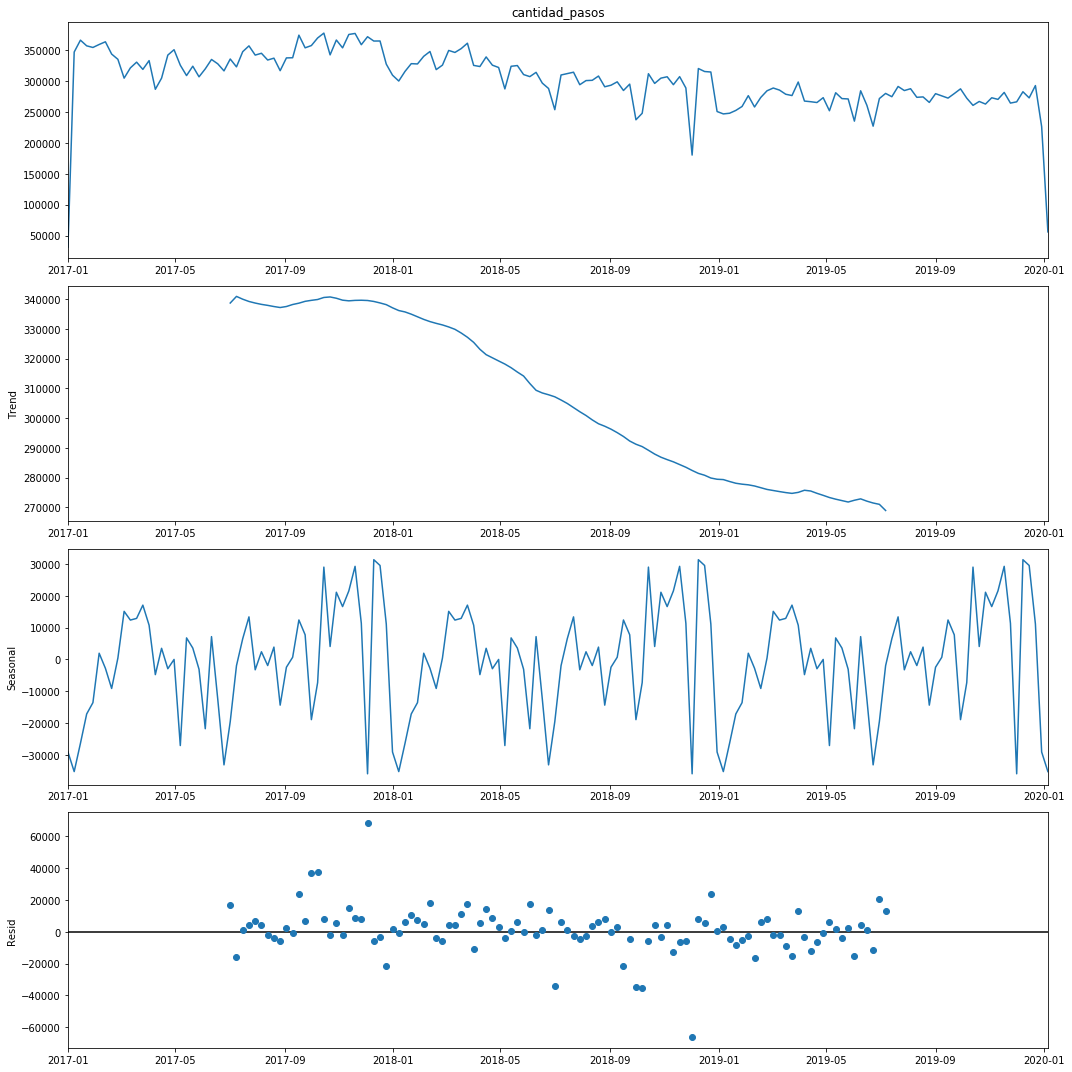

In [39]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,15]
result.plot()
plt.show()

- Trend: hipótesis sobre medios de pago (migración al canal digital)
- Seasonal: la estacionalidad, como vimos anteriormente se da en los meses de vacaciones (enero/feb, julio), que si bien no es tan claro de visualizar como la tendencia gral, teniendo como imput el análisis mensual que se llevó adelante antes, se pueden evidenciar esas bajas de pasos.
- Resid: los ruidos que se observan en el gráfico bien identificados corresponden a los outliers detectados en el AED

### Modelo de Machine Learning

In [40]:
diario

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


Como en todo modelo de machine learning, lo primero que vamos a definir es un modelo benchmark (regresión lineal) para evaluar el funcionamiento del modelo, partiendo de la cantidad de pasos por día, con corte a partir del 30-09-2019 al 31-12-2019. Se definieron esas fechas ya que el 2020 se ve fuertemente afectado, desde el primer trimestre, por el avance de la pandemia.

In [41]:
diario.reset_index(drop = False, inplace = True)

In [42]:
diario['fecha_nro'] = diario['fecha'].apply(lambda x: x.toordinal())

In [43]:
diario.head()

,fecha,cantidad_pasos,fecha_nro
0,2017-01-01,31183,736330
1,2017-01-02,51568,736331
2,2017-01-03,51093,736332
3,2017-01-04,53332,736333
4,2017-01-05,56486,736334


In [44]:
# Modelo Bench

split_date = '2019-09-30'
train = diario[diario.fecha <= split_date ]
test = diario[diario.fecha > split_date ]
# x corresponde a lo días e y a la cantidad de pasos por día

x_train = train['fecha']
y_train = train['cantidad_pasos']

x_test = test['fecha']
y_test = test['cantidad_pasos']

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train.fecha_nro.values.reshape (-1,1), train.cantidad_pasos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

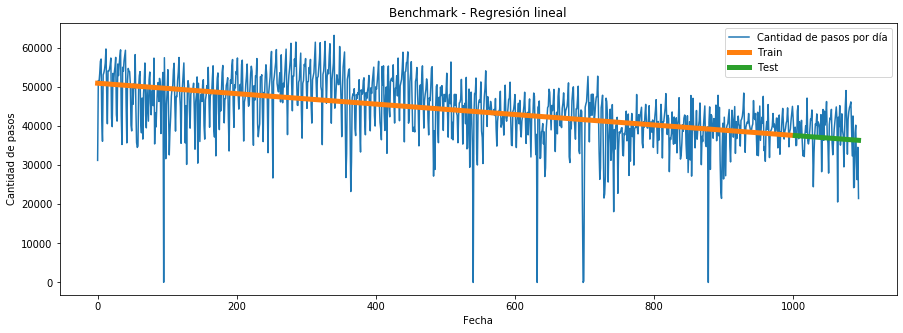

In [46]:
#Gráficamente:

plt.figure(figsize =(15,5))
plt.plot(diario.index,diario.cantidad_pasos, label= "Cantidad de pasos por día")
plt.plot(train.index, lr.predict(train.fecha_nro.values.reshape(-1,1)), lw = 5, label = "Train")
plt.plot(test.index, lr.predict(test.fecha_nro.values.reshape(-1,1)), lw = 5, label = "Test")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de pasos")
plt.title("Benchmark - Regresión lineal")
plt.legend()
plt.show()

Sin haber evaluado su RSME, el gráfico nos indica que si bien la tendencia se continúa para el último trimestre 2019, el error de predicción sería bastante elevado para la asertividad de modelo que buscamos. Vamos a comprobarlo calculando el RMSE del modelo

In [47]:
from sklearn.metrics import mean_squared_error
rmse_regresionlineal = np.sqrt(mean_squared_error(test.cantidad_pasos, lr.predict(test.fecha_nro.values.reshape(-1,1))))
print("El rmse del modelo benchmark de regresión lineal es de ", rmse_regresionlineal)

El rmse del modelo benchmark de regresión lineal es de  5880.402166390071


Modelo ML: se va a tener en cuenta el uso de la librería Prophet y sus oportunidades de predicción en series de tiempo

In [48]:
import pystan
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from pandas import to_datetime

ERROR:fbprophet.plot:Importing plotly failed. Interactive plots will not work.


In [49]:

diario.head()

,fecha,cantidad_pasos,fecha_nro
0,2017-01-01,31183,736330
1,2017-01-02,51568,736331
2,2017-01-03,51093,736332
3,2017-01-04,53332,736333
4,2017-01-05,56486,736334


In [50]:
#renombrar lo df

train = train[['fecha', 'cantidad_pasos']]
train.rename(columns = {'fecha':'ds', 'cantidad_pasos':'y'}, inplace = True)

test = test[['fecha', 'cantidad_pasos']]
test.rename(columns = {'fecha':'ds', 'cantidad_pasos':'y'}, inplace = True)

In [51]:
prophet = Prophet(daily_seasonality = True)

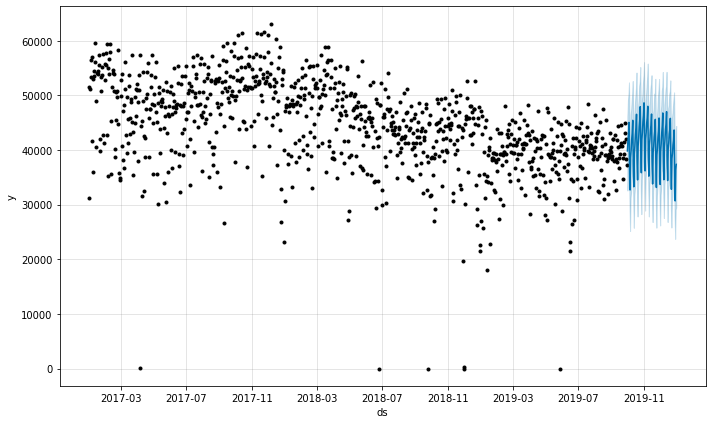

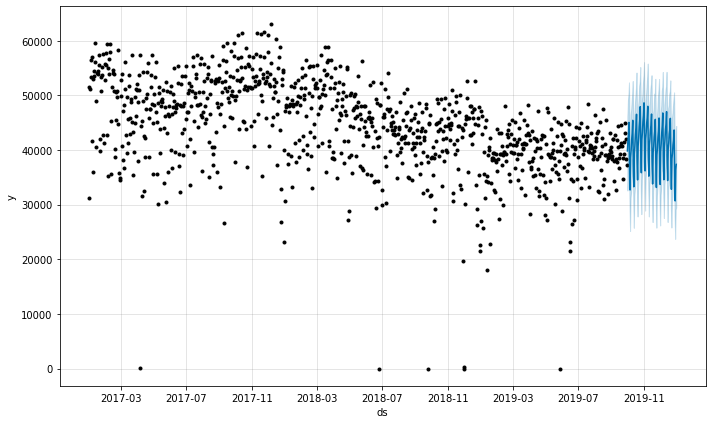

In [52]:
prophet.fit(train)
prediccion = prophet.predict(test)
prophet.plot(prediccion)

A simple vista, pareciera que el ajuste es mejor que mediante nuestro modelo benchmark. Verifiquemos con el RSME

In [53]:
rmse_prophet = np.sqrt(mean_squared_error(test.y, prediccion.yhat))
print("El rmse del modelo prophet es ", rmse_prophet)

El rmse del modelo prophet es  5789.2978158705


Como la mejora es mínima, seguiremos profundizando en el modelo prophet mediante la optimización de hiperparámetros


In [54]:
from sklearn.model_selection import ParameterGrid
params_grid = [{'growth': 'linear', 'changepoint_prior_scale': 0.03, 'daily_seasonality': True},
              {'growth': 'linear', 'changepoint_prior_scale': 0.05, 'daily_seasonality': True},
               {'growth': 'linear', 'changepoint_prior_scale': 0.07, 'daily_seasonality': True}]

In [55]:
for params in params_grid:
        prophet = Prophet(**params)
        prophet.fit(train)
        prediccion = prophet.predict(test)
        
        rmse_prop = np.sqrt(mean_squared_error(test.y, prediccion.yhat))
        parametro = params['changepoint_prior_scale']
        print(("Prueba con {}: {}").format(parametro,rmse_prop))

Prueba con 0.03: 5378.051810663875
Prueba con 0.05: 5789.2978158705
Prueba con 0.07: 6136.536112027686


Con el ajuste de hiperparámetros, se evidencia una mejora a 5300 de RSME. Si bien se evidencia una mejora vs. el modelo benchmark, desde mi perspectiva se considera un poco alejado de un nivel de asertividad deseado (aún con la optimización de hiperparámetros) 

Parte 3

In [ ]:
1 - Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc-? En lo que respecta a la predicciones, mejoran o empeoran? 